<a href="https://colab.research.google.com/github/artem-barsov/Numerical-Methods/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, exp

#### 1. Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки $h$. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением.

$y''+y-\sin 3x=0$

$y(0)=1$

$y'(0)=1$

$x\in[0;1],\ \ \ h=0.1$

Точное решение: $y=\cos x+\frac{11}{8}\sin x - \frac{\sin3x}{8}$

In [ ]:
f = lambda x,y,z: z
g = lambda x,y,z: sin(3*x) - y
h = 0.1
l, r = 0, 1
x0, y0, z0 = 0, 1, 1
y_exact = lambda x: cos(x) + 11/8*sin(x) - sin(3*x)/8

In [ ]:
def Euler(f, g, l, r, h, y0, z0):
    x = np.linspace(l, l+h*int((r-l)/h), int((r-l)/h)+1)
    y = [y0]
    z = [z0]
    for i in range(len(x)-1):
        y.append(y[i] + h * f(x[i], y[i], z[i]))
        z.append(z[i] + h * g(x[i], y[i], z[i]))
    return x, y, z

In [ ]:
def RungeKutta(f, g, l, r, h, y0, z0):
    x = np.linspace(l, l+h*int((r-l)/h), int((r-l)/h)+1)
    y, z = [y0], [z0]
    for i in range(len(x)-1):
        K1 = h * f(x[i], y[i], z[i]);
        L1 = h * g(x[i], y[i], z[i]);
        K2 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1);
        L2 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K1, z[i] + 0.5 * L1);
        K3 = h * f(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2);
        L3 = h * g(x[i] + 0.5 * h, y[i] + 0.5 * K2, z[i] + 0.5 * L2);
        K4 = h * f(x[i] + h, y[i] + K3, z[i] + L3);
        L4 = h * g(x[i] + h, y[i] + K3, z[i] + L3);
        dy = (K1 + 2.0 * K2 + 2.0 * K3 + K4) / 6.0;
        dz = (L1 + 2.0 * L2 + 2.0 * L3 + L4) / 6.0;
        y.append(y[i] + dy)
        z.append(z[i] + dz)
    return x, y, z

In [ ]:
def Adams(f, g, l, r, h, y0, z0):
    x = np.linspace(l, l+h*int((r-l)/h), int((r-l)/h)+1)
    y, z = RungeKutta(f, g, l, l+3*h, h, y0, z0)[1:]
    k = (55, -59, 37, -9)
    for i in range(4, len(x)):
        dz = h/24*sum([k[j-1] * g(x[i-j], y[-j], z[-j]) for j in range(1, 5)])
        dy = h/24*sum([k[j-1] * f(x[i-j], y[-j], z[-j]) for j in range(1, 5)])
        z.append(z[-1] + dz)
        y.append(y[-1] + dy)
    return x, y, z

In [ ]:
def Runge_Romberg_error(y_2h, y_h, p):
    coef = 1 / (2**p - 1)
    return [coef * abs(y_h[2*i] - y_2h[i]) for i in range(len(y_2h))]

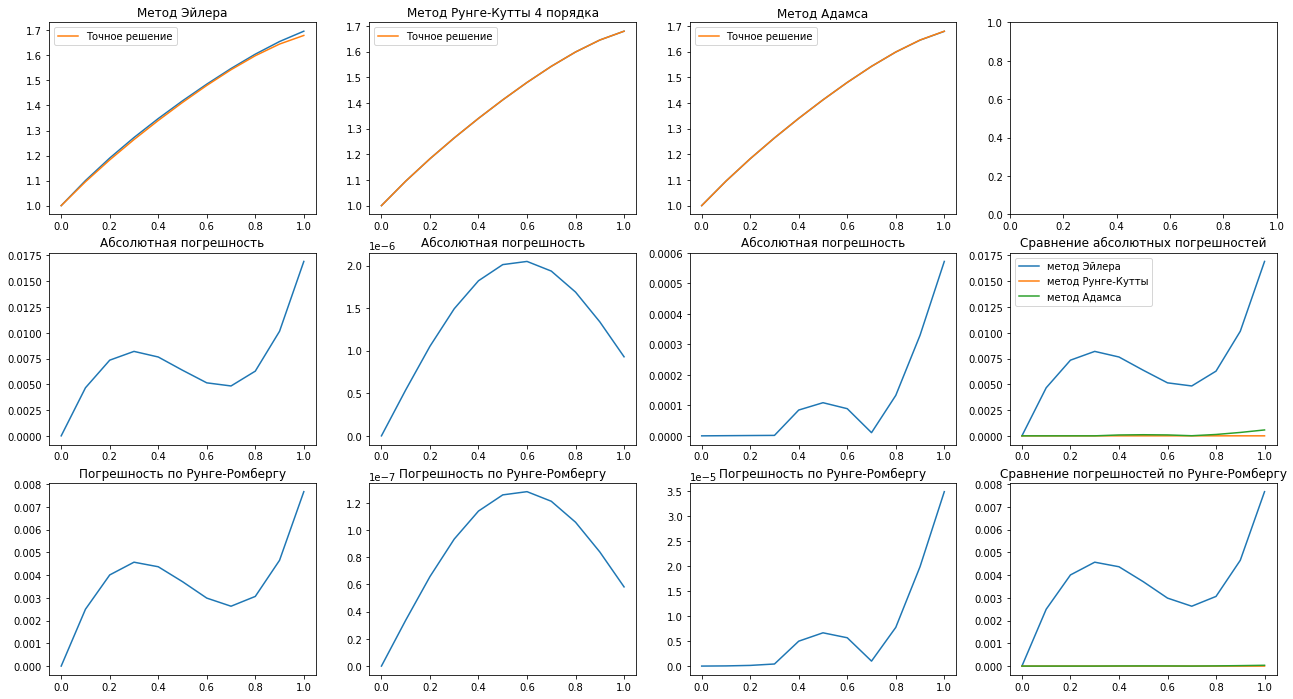

In [ ]:
figure, axis = plt.subplots(3, 4, figsize=(22, 12))
x = np.linspace(l, l+h*int((r-l)/h), int((r-l)/h)+1)
exact_y = np.vectorize(y_exact)(x)

eul_y = np.array(Euler(f, g, l, r, h, y0, z0)[1])
axis[0][0].set_title('Метод Эйлера')
axis[0][0].plot(x, eul_y)
axis[0][0].plot(x, exact_y, label='Точное решение')
axis[0][0].legend(loc='best')
axis[1][0].set_title('Абсолютная погрешность')
axis[1][0].plot(x, abs(exact_y-eul_y))
axis[2][0].set_title('Погрешность по Рунге-Ромбергу')
axis[2][0].plot(x, Runge_Romberg_error(eul_y, Euler(f, g, l, r, h/2, y0, z0)[1], 1))

runkut_y = np.array(RungeKutta(f, g, l, r, h, y0, z0)[1])
axis[0][1].set_title('Метод Рунге-Кутты 4 порядка')
axis[0][1].plot(x, runkut_y)
axis[0][1].plot(x, exact_y, label='Точное решение')
axis[0][1].legend(loc='best')
axis[1][1].set_title('Абсолютная погрешность')
axis[1][1].plot(x, abs(exact_y-runkut_y))
axis[2][1].set_title('Погрешность по Рунге-Ромбергу')
axis[2][1].plot(x, Runge_Romberg_error(runkut_y, RungeKutta(f, g, l, r, h/2, y0, z0)[1], 4))

adams_y = np.array(Adams(f, g, l, r, h, y0, z0)[1])
axis[0][2].set_title('Метод Адамса')
axis[0][2].plot(x, adams_y)
axis[0][2].plot(x, exact_y, label='Точное решение')
axis[0][2].legend(loc='best')
axis[1][2].set_title('Абсолютная погрешность')
axis[1][2].plot(x, abs(exact_y-adams_y))
axis[2][2].set_title('Погрешность по Рунге-Ромбергу')
axis[2][2].plot(x, Runge_Romberg_error(adams_y, Adams(f, g, l, r, h/2, y0, z0)[1], 4))

axis[1][3].set_title('Сравнение абсолютных погрешностей')
axis[1][3].plot(x, abs(exact_y-eul_y), label='метод Эйлера')
axis[1][3].plot(x, abs(exact_y-runkut_y), label='метод Рунге-Кутты')
axis[1][3].plot(x, abs(exact_y-adams_y), label='метод Адамса')
axis[1][3].legend(loc='best')

axis[2][3].set_title('Сравнение погрешностей по Рунге-Ромбергу')
axis[2][3].plot(x, Runge_Romberg_error(eul_y, Euler(f, g, l, r, h/2, y0, z0)[1], 1))
axis[2][3].plot(x, Runge_Romberg_error(runkut_y, RungeKutta(f, g, l, r, h/2, y0, z0)[1], 4))
axis[2][3].plot(x, Runge_Romberg_error(adams_y, Adams(f, g, l, r, h/2, y0, z0)[1], 4));

#### 2. Реализовать метод стрельбы и конечно-разностный метод решения краевой задачи для ОДУ в виде программ. С использованием разработанного программного обеспечения решить краевую задачу для обыкновенного дифференциального уравнения 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

$xy''+2y'-xy=0$

$y'(1)=0$

$1.5y(2)+y'(2)=e^2$

Точное решение: $y(x)=\frac{e^x}{x}$

In [ ]:
f = lambda x,y,z: z
g = lambda x,y,z: y - 2 * z / x
y_exact = lambda x: exp(x) / x
h = 0.2
a, b = 1, 2
alpha, beta, y0 = 0, 1, 0
delta, gamma, y1 = 1.5, 1, exp(2)
EPS = 1e-9
px = lambda x: 2 / x
qx = lambda x: -1
fx = lambda x: 0

In [ ]:
def shooting_method(f, g, a, b, h, alpha, beta, y0, delta, gamma, y1, eps=1e-4):
    def get_start_cond(eta):
        return (y0 - alpha * eta) / beta

    def get_eta_next(eta_prev, eta, sol_prev, sol):
        yb_prev = sol_prev[1][-1]
        zb_prev = sol_prev[2][-1]
        phi_prev = delta * yb_prev + gamma * zb_prev - y1
        yb = sol[1][-1]
        zb = sol[2][-1]
        phi = delta * yb + gamma * zb - y1
        return eta - (eta - eta_prev) / (phi - phi_prev) * phi

    eta_prev, eta = 1.0, 0.8
    while abs(eta-eta_prev) > eps:
        sol_prev = Euler(f, g, a, b, h, eta_prev, get_start_cond(eta_prev))
        sol      = Euler(f, g, a, b, h, eta,      get_start_cond(eta))
        eta_prev, eta = eta, get_eta_next(eta_prev, eta, sol_prev, sol)
    return sol

In [ ]:
def tridiagonal_algo(A=None, alpha=None, beta=None, gamma=None, b=None):
    if not all([alpha, beta, gamma]) and A is not None:
        alpha = [0] + [A[i+1][i] for i in range(len(A)-1)]
        beta = [-A[i][i] for i in range(len(A))]
        gamma = [A[i][i+1] for i in range(len(A)-1)] + [0]
    P = [-gamma[0] / beta[0]]
    Q = [b[0] / beta[0]]
    for i in range(1, len(b)):
        P.append(-gamma[i] / (beta[i] + alpha[i] * P[i-1]))
        Q.append((b[i] - alpha[i] * Q[i-1]) / (beta[i] + alpha[i] * P[i-1]))
    x = [Q[-1]]
    for i in range(len(b)-2, -1, -1):
        x.append(P[i] * x[-1] + Q[i])
    return x[::-1]

In [ ]:
def finite_difference_method(px, qx, fx, a, b, h, alpha, beta, y0, delta, gamma, y1):
    x = np.linspace(a, a+h*int((b-a)/h), int((b-a)/h)+1)
    d1 = [0]            + [1 - px(xi)*h/2 for xi in x[1:-1]]     + [-gamma]
    d2 = [h*alpha-beta] + [-2 + h**2 * qx(xi) for xi in x[1:-1]] + [h*delta+gamma]
    d3 = [beta]         + [1 + px(xi)*h/2 for xi in x[1:-1]]     + [0]
    d  = [h * y0]       + [h**2 * fx(xi) for xi in x[1:-1]]      + [h * y1]
    return x, tridiagonal_algo(alpha=d1, beta=d2, gamma=d3, b=d)

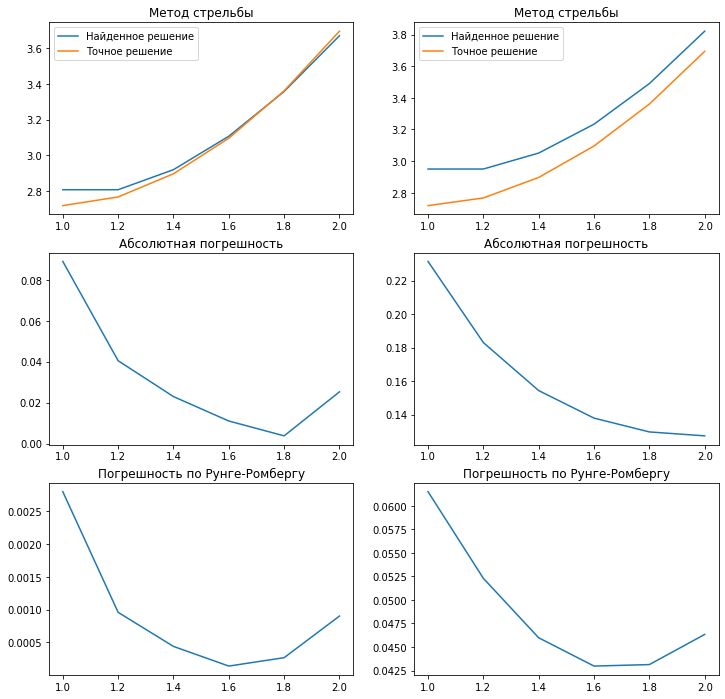

In [ ]:
figure, axis = plt.subplots(3, 2, figsize=(12, 12))
x = np.linspace(a, a+h*int((b-a)/h), int((b-a)/h)+1)
exact_y = np.vectorize(y_exact)(x)

shoot_y = shooting_method(f, g, a, b, h, alpha, beta, y0, delta, gamma, y1, EPS)[1]
axis[0][0].set_title('Метод стрельбы')
axis[0][0].plot(x, shoot_y, label='Найденное решение')
axis[0][0].plot(x, exact_y, label='Точное решение')
axis[0][0].legend(loc='best')
axis[1][0].set_title('Абсолютная погрешность')
axis[1][0].plot(x, abs(exact_y-shoot_y))
axis[2][0].set_title('Погрешность по Рунге-Ромбергу')
axis[2][0].plot(x, Runge_Romberg_error(shoot_y, shooting_method(f, g, a, b, h/2, alpha, beta, y0, delta, gamma, y1, EPS)[1], 4))

findif_y = finite_difference_method(px, qx, fx, a, b, h, alpha, beta, y0, delta, gamma, y1)[1]
axis[0][1].set_title('Метод стрельбы')
axis[0][1].plot(x, findif_y, label='Найденное решение')
axis[0][1].plot(x, exact_y, label='Точное решение')
axis[0][1].legend(loc='best')
axis[1][1].set_title('Абсолютная погрешность')
axis[1][1].plot(x, abs(exact_y-findif_y))
axis[2][1].set_title('Погрешность по Рунге-Ромбергу')
axis[2][1].plot(x, Runge_Romberg_error(findif_y, shooting_method(f, g, a, b, h/2, alpha, beta, y0, delta, gamma, y1, EPS)[1], 2))